# 효율적인 모델 학습을 위한 이미지 해상도 줄이기

여기서는, 이미지 해상도를 줄이는 과정을 보여줍니다.

높이와 너비 모두 300 픽셀이상이면서 가장 작은 사이즈가 되도록 줄입니다.

4개의 다른 채널에 대해 줄이기 전과 후 이미지를 출력하여 보여줍니다.

In [1]:
import os
from collections import defaultdict
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import random
from skimage.measure import block_reduce
import numpy as np
from PIL import Image
from skimage.io import imread, imsave

In [2]:
rawdatapath = "raw_images/201103030645_image/"
outputpath = "reduced_images/201103030645_image/"

In [3]:
def rgb2gray(rgb):
    ratio = [0.2989, 0.5870, 0.1140]
    ret = np.expand_dims(np.dot(rgb[...,:3], ratio), axis=2)
    return ret

coms_mi_le1b_ir02_ea040ps_201103030645.png


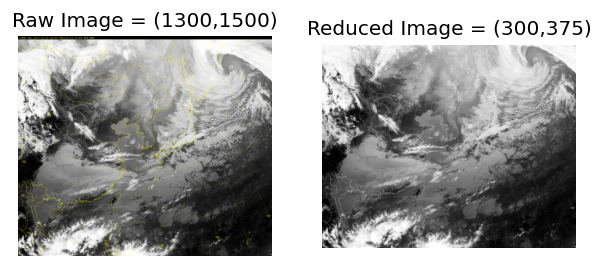

coms_mi_le1b_ir01_ea040ps_201103030645.png


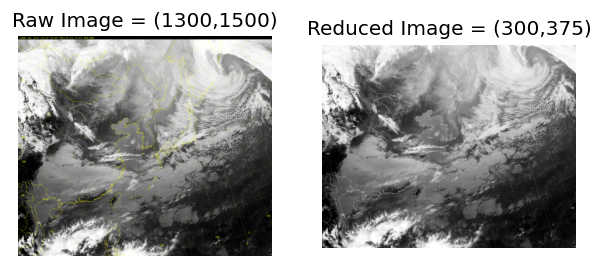

coms_mi_le1b_wv_ea040ps_201103030645.png


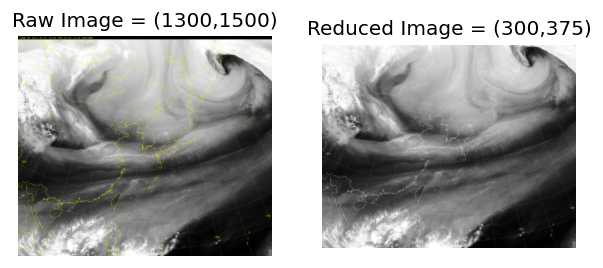

coms_mi_le1b_swir_ea040ps_201103030645.png


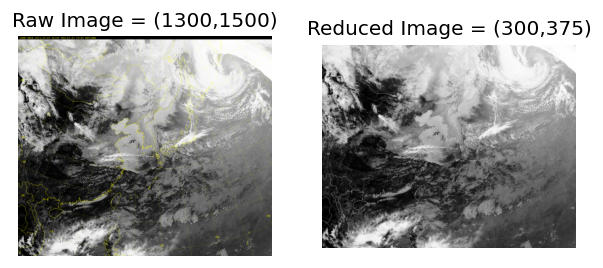

In [4]:
if os.path.isdir(outputpath) is False:
    os.makedirs(outputpath)

show_flag = False
if os.path.isdir(rawdatapath):
    rawfile_list = os.listdir(rawdatapath)
    for f in rawfile_list:
        if f.endswith(".png") is False:
            continue
        print(f)
        rawfile_path = rawdatapath + f
        rawimage = plt.imread(rawfile_path)
        rawimage_size = rawimage.shape
        
        processedimage = rgb2gray(rawimage[100:])
        processedimage = np.squeeze(processedimage)

        # Reduce Resolution by mean-pooling
        s = min(rawimage_size[0], rawimage_size[1])
        reduce_size = 1
        i = 1
        while True:
            if (s // i) < 300:
                reduce_size = i-1
                break
            i += 1
        reducedimage = block_reduce(processedimage, block_size=(reduce_size, reduce_size), func=np.mean)
        reducedimage_size = reducedimage.shape

        save_image = reducedimage * 255
        save_image = save_image.astype(np.uint8)

        imsave(outputpath + f, save_image)

        fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120)
        axes[0].imshow(rawimage, cmap='gray')
        axes[0].set_title("Raw Image = (%d,%d)" % (rawimage_size[0], rawimage_size[1]))
        axes[1].imshow(reducedimage, cmap='gray')
        axes[1].set_title("Reduced Image = (%d,%d)" % (reducedimage_size[0], reducedimage_size[1]))
        axes[0].axis('off')
        axes[1].axis('off')
        plt.show()